<div style="background-color:#044389; text-align:center; vertical-align: middle; padding:40px 0; margin-top:30px">
<h1 style="color:#FCFF4B">DataLab - Machine Learning</h1>
<b style="color:black">Tim Oosterling, Rogier Gernaat & Ifraah Ghedi</b>
    </div>

<h2 style="color:#044389">0 voorbereiding</h2>

In [1]:
#importeren van libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#inladen van data 
train = pd.read_csv('train_c.csv') 
test= pd.read_csv('test_c.csv') 
display(test.head(), test.head())

,p_id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,1,85,66,29,0,26.6,0.351,31
1,4,0,137,40,35,168,43.1,2.288,33
2,13,1,189,60,23,846,30.1,0.398,59
3,14,5,166,72,19,175,25.8,0.587,51
4,20,3,126,88,41,235,39.3,0.704,27


,p_id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,1,85,66,29,0,26.6,0.351,31
1,4,0,137,40,35,168,43.1,2.288,33
2,13,1,189,60,23,846,30.1,0.398,59
3,14,5,166,72,19,175,25.8,0.587,51
4,20,3,126,88,41,235,39.3,0.704,27


| Kolom   |   Omschrijving |
|:--------|-----------:|
| p_id   |Dit lijkt een identificatienummer of index te zijn voor elk gegevenspunt. Het lijkt geen relevante functie te zijn voor de voorspelling van diabetes. |
| Pregnancies     | Pregnancies: Het aantal zwangerschappen dat de persoon heeft gehad. Dit is een numerieke functie die aangeeft hoe vaak de persoon zwanger is geweest. |
|  Glucose | De bloedglucosespiegel van de persoon, gemeten in milligram per deciliter (mg/dL). Dit is een numerieke functie die de glucosespiegel aangeeft. |
| Bloodpressure |De bloeddruk van de persoon, gemeten in millimeters kwik (mm Hg). Dit is een numerieke functie die de bloeddruk aangeeft. |
| Insulin |De insulinespiegel van de persoon, gemeten in milli-eenheden per milliliter (mu/ml). Dit is een numerieke functie die de insulinespiegel aangeeft.|
| BMI | De body mass index (BMI) van de persoon, berekend als gewicht in kilogram gedeeld door het kwadraat van de lengte in meters. Dit is een numerieke functie die de BMI aangeeft.|
| DiabetesPedigreeFunction | Een numerieke functie die een maatstaf lijkt te zijn voor genetische aanleg voor diabetes, berekend op basis van familiegeschiedenis.|
| Age | De leeftijd van de persoon in jaren. Dit is een numerieke functie die de leeftijd van de persoon aangeeft. |
| Outcome | Dit zegt of iemand diabetes heeft of niet. Waarbij 1 staat voor diabates en 0 niet |

<h4 style="color:#7CAFC4">Opdracht 1: EDA</h2>

##### Om machine learning met Scikit-Learn te kunnen toepassen, zijn er 3 belangrijke vereisten:

###### Een dataframe: 
De gegevens moeten georganiseerd zijn in de vorm van een dataframe, waarbij elke rij een datapunt vertegenwoordigt en elke kolom een functie (feature) of de targetvariabele bevat.

###### Numerieke waarden:
De dataset moet voornamelijk numerieke waarden bevatten, omdat Scikit-Learn voornamelijk met numerieke gegevens werkt.

###### Niet te veel ontbrekende waarden:
Zorg ervoor dat de dataset niet veel ontbrekende waarden bevat, of dat je een strategie hebt om deze waarden aan te pakken, zoals invullen of verwijderen.





###### Check of het een pd.DataFrame is 

In [2]:
#check of in dataframe is
type(train)

pandas.core.frame.DataFrame

###### Check: data is georganiseerd in dataframe

In [3]:
#check of nummerieke waardes zijn
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   p_id                      614 non-null    int64  
 1   Pregnancies               614 non-null    int64  
 2   Glucose                   614 non-null    int64  
 3   BloodPressure             614 non-null    int64  
 4   SkinThickness             614 non-null    int64  
 5   Insulin                   614 non-null    int64  
 6   BMI                       614 non-null    float64
 7   DiabetesPedigreeFunction  614 non-null    float64
 8   Age                       614 non-null    int64  
 9   Outcome                   614 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 48.1 KB


###### Check: allemaal integers of floats, dus het zijn allemaal numerieke waardes.

In [4]:
#check missende waardes
print(train.isnull().sum())

p_id                        0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Er zijn geen missende waardes, maar ontbrekende waardes kunnen soms weergeven worden met getal 0

In [5]:
x = (train[["p_id","Pregnancies",'Glucose',"DiabetesPedigreeFunction" ,'BloodPressure', "Age",'SkinThickness', 'Insulin', 'BMI']] == 0).sum()
pd.DataFrame(x,columns = ["Aantal missende/nul waardes "])

,Aantal missende/nul waardes
p_id,1
Pregnancies,93
Glucose,4
DiabetesPedigreeFunction,0
BloodPressure,31
Age,0
SkinThickness,184
Insulin,300
BMI,11


#### 7 uit de 9 kolommen hebben "0" waardes, Hoe gaan we hiermee om?
    
###### 1. p_id ; 0 waarde kan betekenen dat de patient geen id heeft, dit maakt echter niet uit sinds dit geen belangrijke kolom is voor het model
###### 2. Pregnancies; de 0 waarde hier betekend dat de patient geen pregnancies heeft gehad
###### 3. Glucose; De bloedglucosespiegel van een persoon kan normaal gesproken niet 0 mg/dL zijn. Een nulwaarde in deze kolom zou waarschijnlijk wijzen op een ontbrekende waarde of een fout in de gegevensregistratie.
###### 4. BloodPressure: De bloeddruk van een persoon kan ook niet normaal gesproken 0 mm Hg zijn. Een nulwaarde hier is niet realistisch en zou meestal worden beschouwd als een ontbrekende waarde.
###### 5. SkinThickness: De huidplooidikte kan ook niet normaal gesproken 0 millimeter zijn. Een nulwaarde hier duidt meestal op een ontbrekende waarde.
###### 6. Insulin: De insulinespiegel wordt gemeten in milli-eenheden per milliliter (mu/ml) en kan niet normaal gesproken 0 zijn. Een nulwaarde hier wijst meestal op een ontbrekende waarde.
###### 7. BMI (Body Mass Index): De BMI wordt berekend op basis van gewicht en lengte en kan niet normaal gesproken 0 zijn, tenzij de persoon ofwel geen gewicht heeft (wat onrealistisch is) ofwel ontbrekende gegevens heeft voor gewicht en/of lengte.
,
- Conclusie: we hoeven dus alleen te kijken naar 5 kolommen, P_id en Pregnancies vallen af sinds deze kolommen of een logische 0 waarde heeft of niet uit maakt voor het model

Nu willen we nog kijken naar enige interessante waardes die wij niet kunnen uitleggen, daarna gaan we kijken wat we hiermee gaan doen. Laten we beginnen met kijken naar de verdeling van de metingen

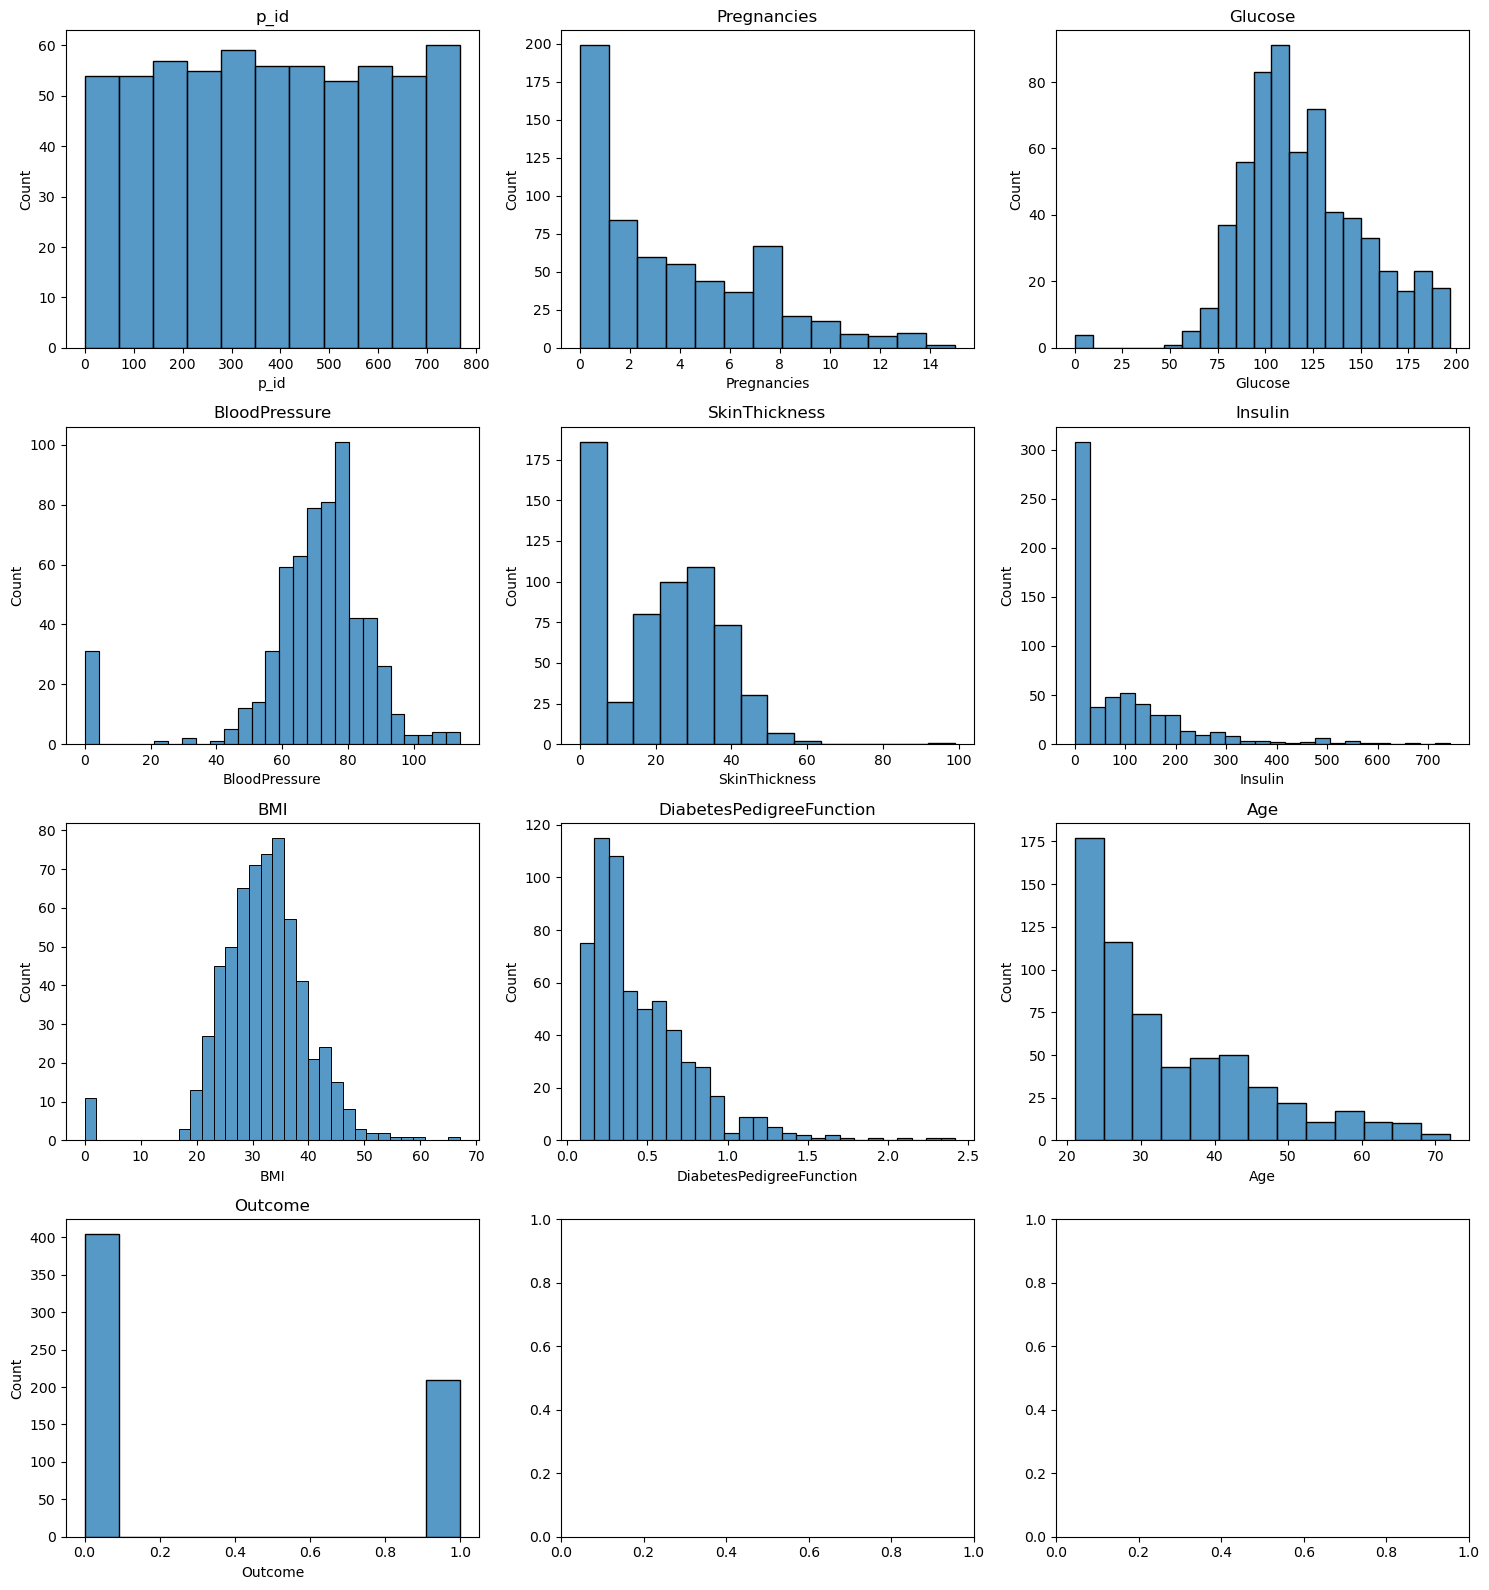

In [6]:
fig, axes = plt.subplots(len(train.columns) // 3 + (len(train.columns) % 3 > 0), 3, figsize=(15, 5 * len(train.columns) // 3))

for idx, col in enumerate(train.columns):
    sns.histplot(train[col], ax=axes.ravel()[idx])
    axes.ravel()[idx].set_title(col)

plt.tight_layout()
plt.show()


### Opmerkelijkheden
- Het eerste wat ons opviel is dat bij bloeddruk er ook metingen onder de 60 liggen waarbij ook een aantal metingen 0, hierbij zijn de getallen onder de 60 waarbij wij zeggen dat dit mogelijke fouten zijn in de data sinds een volwassen persoon niet kan overleven met bijvoorbeeld een bloeddruk van 40-50
- Het tweede wat ons opviel is dat we bij Insuline waardes hebben van 0 wat uiteraard zeer onwaarschijnlijk is maar ook metingen van 500-700 dit is ook een zeer onwaarschijnlijke situatie sinds zelfs voor mensen met diabetes type 2 dit een enorm hoge schaal is
- Ten derde vinden wij de kolom glucose erg interessant. De hoge waardes tussen de 180-200 zou een grote kans van zijn dat deze mensen ook daadwerkelijk diabetes hebben. De lage waardes kunnen normaal zijn liggend aan hoeveel de mensen hebben gegeten die dag, dus de waarde 50 is nog redelijk mogelijk en laten we voor gezien, de 0 waardes gaan we uiteraard wel wat mee doen

###### Nu gaan we kijken naar de outliers

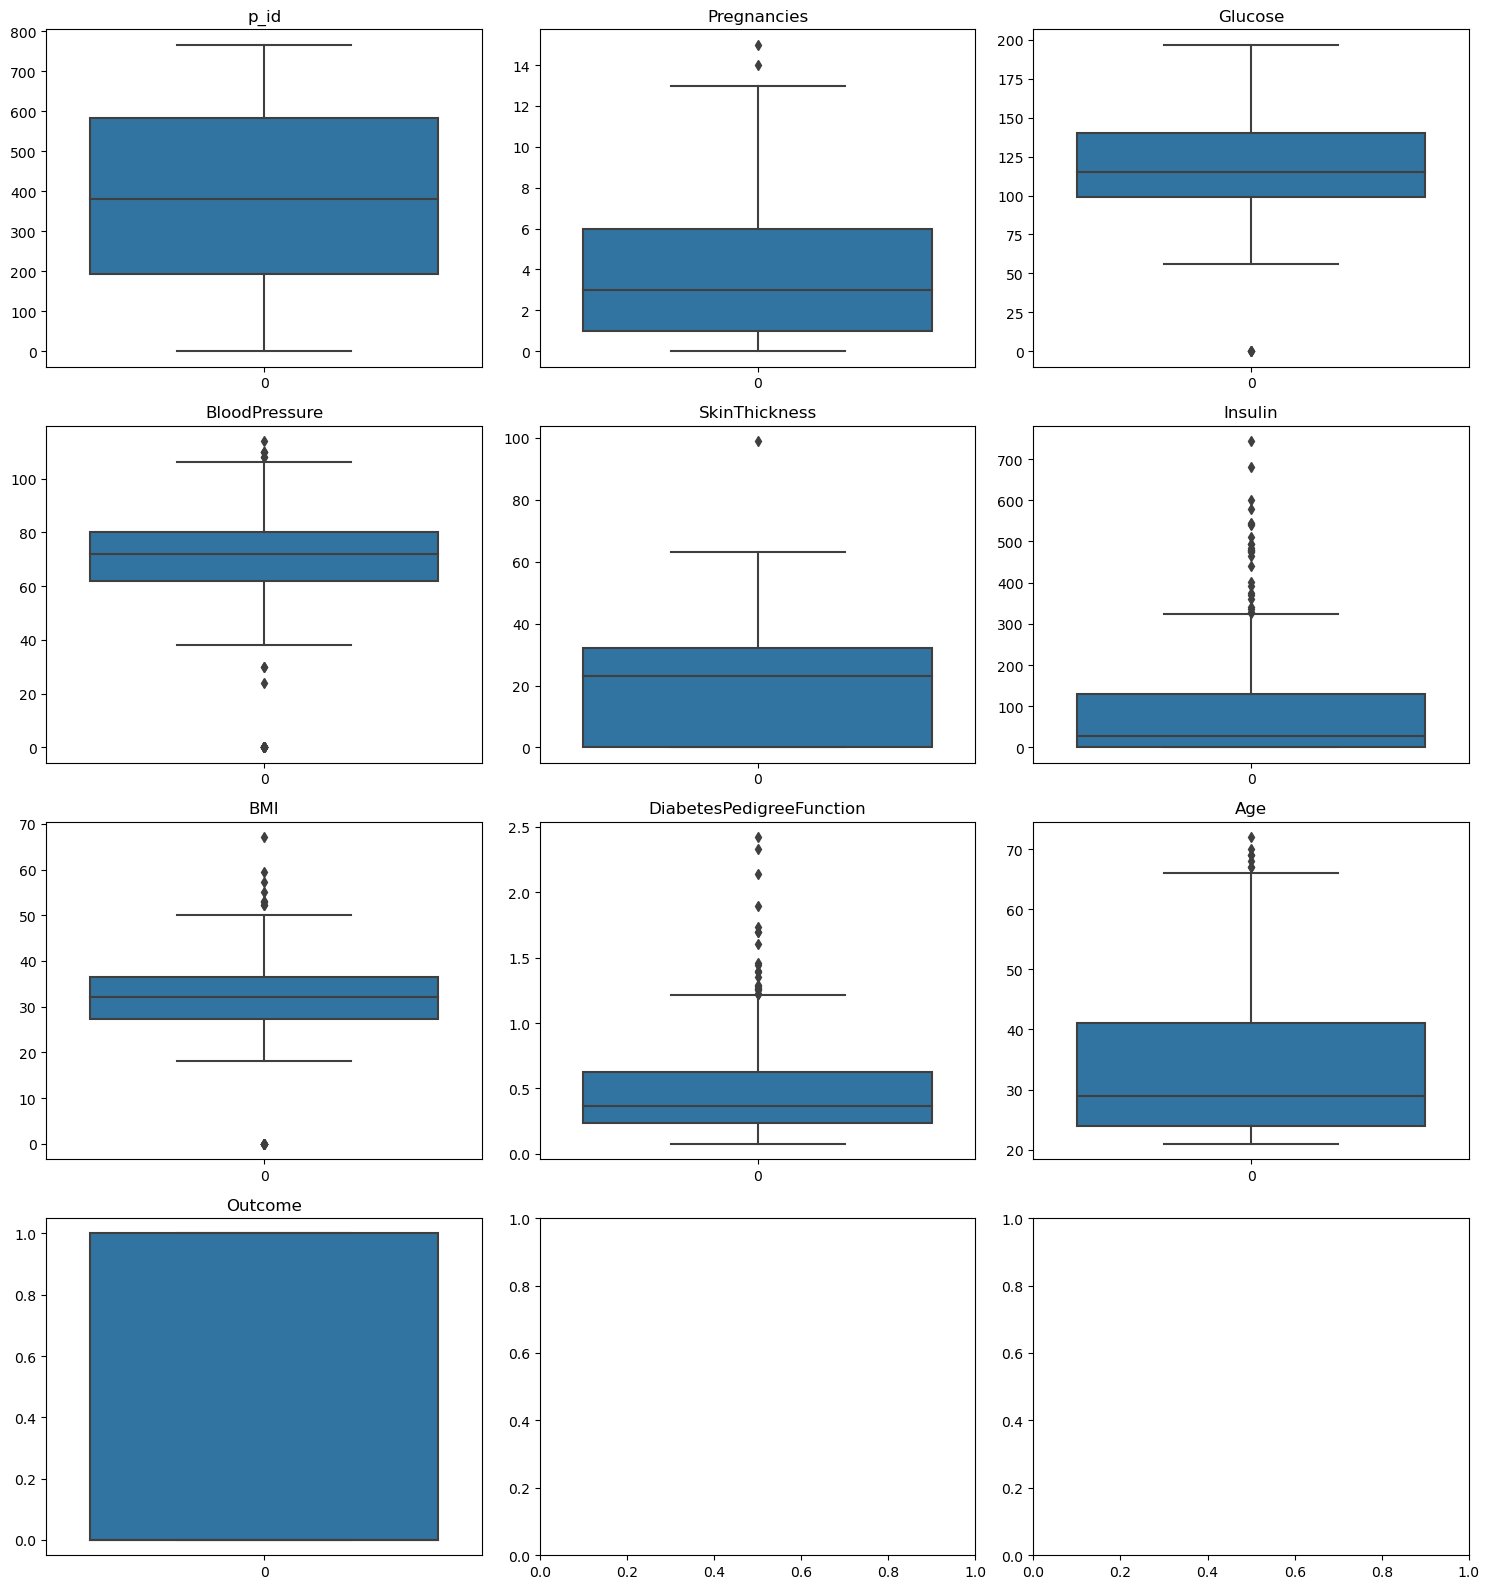

In [8]:
# Maak subplots
fig, axes = plt.subplots(len(train.columns) // 3 + (len(train.columns) % 3 > 0), 3, figsize=(15, 5 * len(train.columns) // 3))
axes = axes.ravel()

for idx, col in enumerate(train.columns):
    sns.boxplot(train[col], ax=axes.ravel()[idx])
    axes.ravel()[idx].set_title(col)

plt.tight_layout()
plt.show()


Hierbij merken we vooral dat bij de kolommen Insuline, BMI, DiabetesPedigreeFunction en Bloodpressure veel uitschieters vallen. Dit vinden wij overigens wel interessant sinds de uitschieters die niet bij 0 behoren wel ons kunnen helpen bij het voorspellen van Diabetes, Bijvoorbeeld hoge glucose/insuline waardes zijn vaak cases van diabetes

In [9]:
print("Glucose: 100")
print(train[train["Glucose"] > 100]["Outcome"].value_counts())
print("\n""Glucose: 120")
print(train[train["Glucose"] > 120]["Outcome"].value_counts())
print("\n""Glucose: 140")
print(train[train["Glucose"] > 140]["Outcome"].value_counts())
print("\n""Glucose: 160")
print(train[train["Glucose"] > 160]["Outcome"].value_counts())

Glucose: 100
0    250
1    193
Name: Outcome, dtype: int64

Glucose: 120
1    153
0    117
Name: Outcome, dtype: int64

Glucose: 140
1    104
0     49
Name: Outcome, dtype: int64

Glucose: 160
1    65
0    15
Name: Outcome, dtype: int64


Hierzo zien we bijvoorbeeld dat vanaf een Glucose niveau van 120 de verhouding van "0" geen diabetes en "1" wel diabetes erg verandert

In [10]:
#basistatistieken van alle kolommen
train.describe()


,p_id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,385.542345,3.809446,120.465798,68.903909,20.456026,81.250814,31.929642,0.468096,33.265472,0.342020
std,222.135103,3.375544,31.959619,19.933385,16.063105,116.947384,8.136791,0.329203,11.851427,0.474773
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,194.250000,1.000000,99.000000,62.000000,0.000000,0.000000,27.400000,0.238000,24.000000,0.000000
50%,380.500000,3.000000,115.000000,72.000000,23.000000,27.000000,32.150000,0.365500,29.000000,0.000000
75%,583.750000,6.000000,140.000000,80.000000,32.000000,130.000000,36.500000,0.628500,41.000000,1.000000
max,767.000000,15.000000,197.000000,114.000000,99.000000,744.000000,67.100000,2.420000,72.000000,1.000000


##### laten we kijken naar hoe de kolommen correleren met elkaar

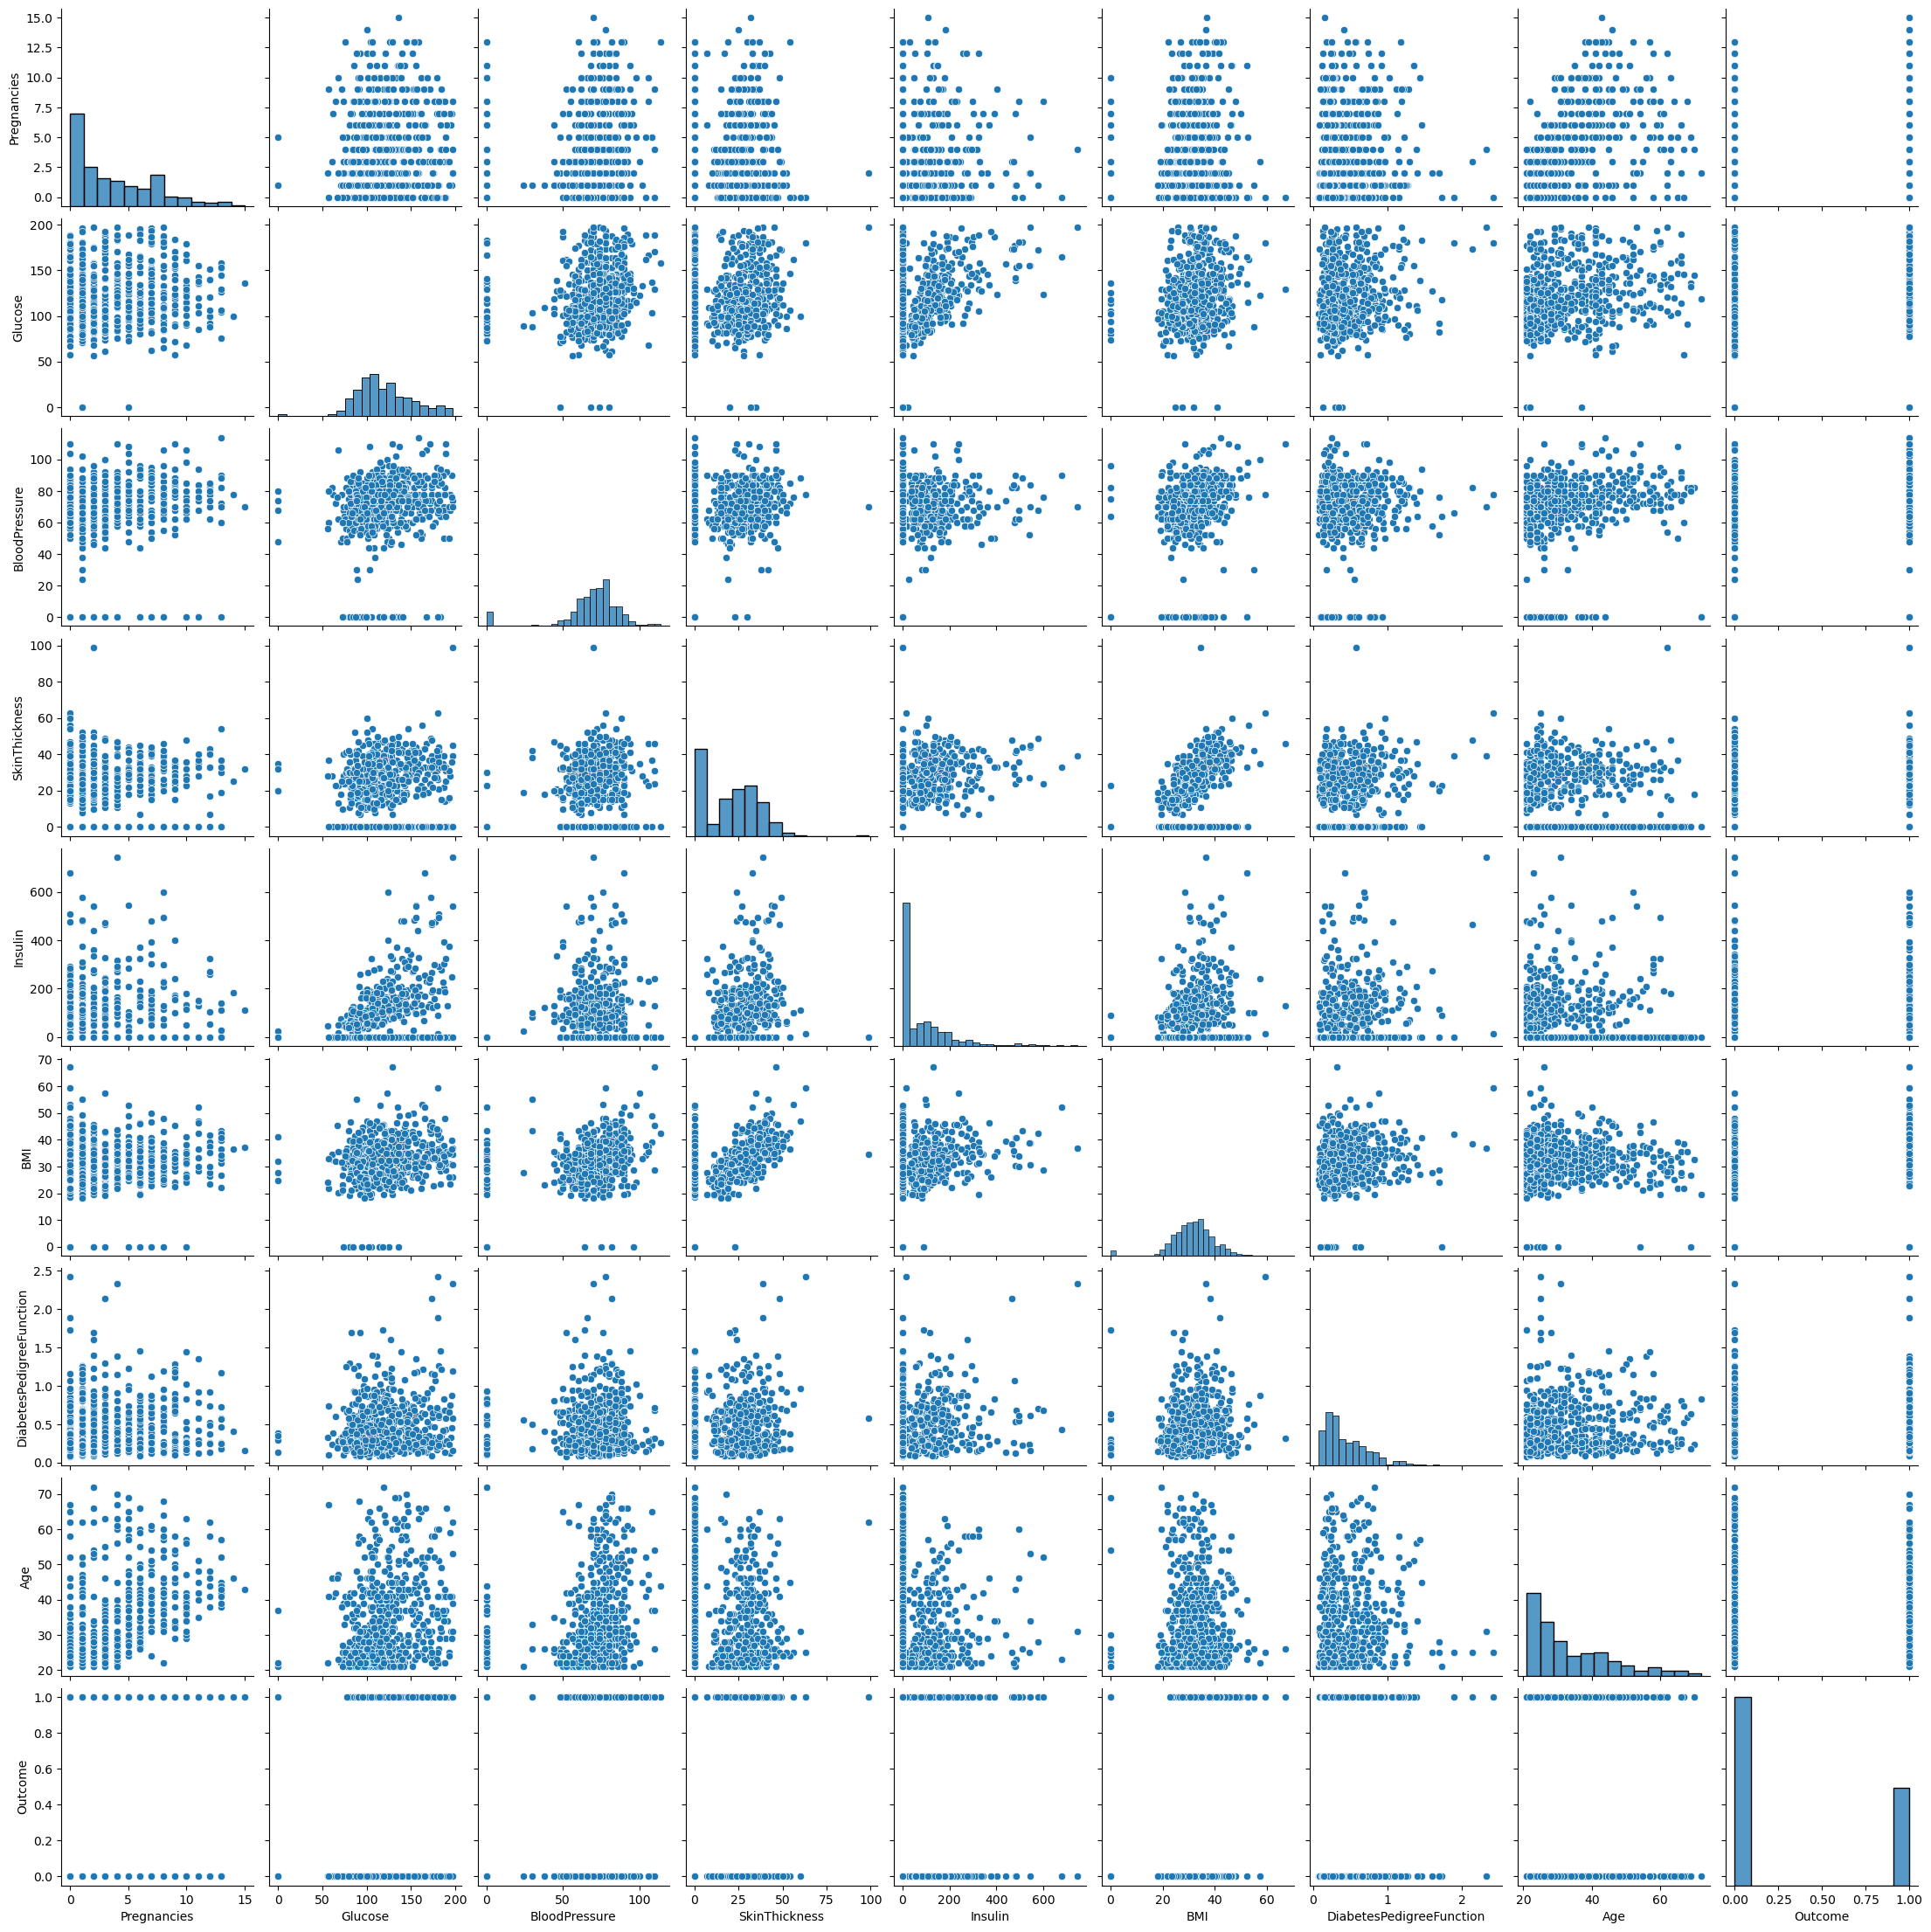

In [11]:
# Veronderstelling: je dataframe heet df
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
sns.pairplot(train[columns])
plt.show()

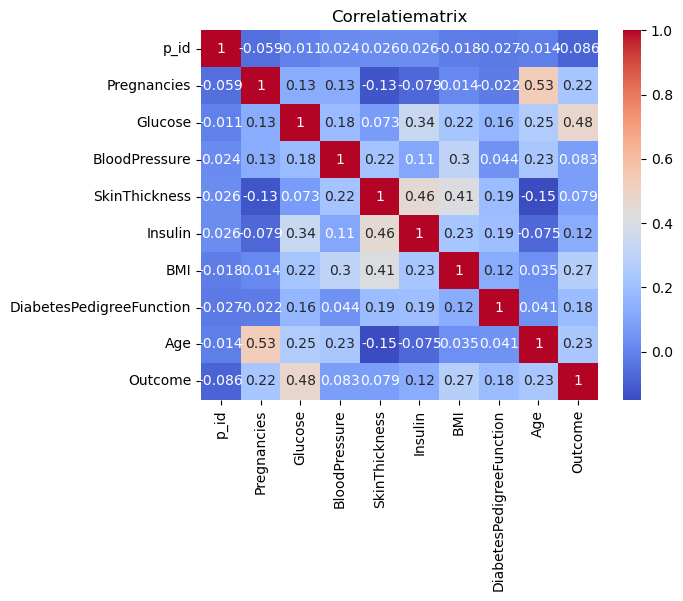

In [12]:
# Bereken de correlatiematrix
corr_matrix = train.corr()
# Plot de correlatiematrix als een heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlatiematrix')
plt.show()

Correlaties tussen

Onafhankelijk

Leeftijd & zwangerschap met 0.53
Skinntickness & BMI
Afhankelijk

Outcome & glucose

Maar de correlaties liggen zo aanzienlijk laag dat we hier niet heel veel mee kunnen doen
Wat wel een belangrijke is om te onthouden is Outcome & Glucose sinds deze erg belangrijk kan zijn voor het model

###### Hier hebben we nog een overzicht van de gemiddelde waardes van wel of geen diabetes per kolom

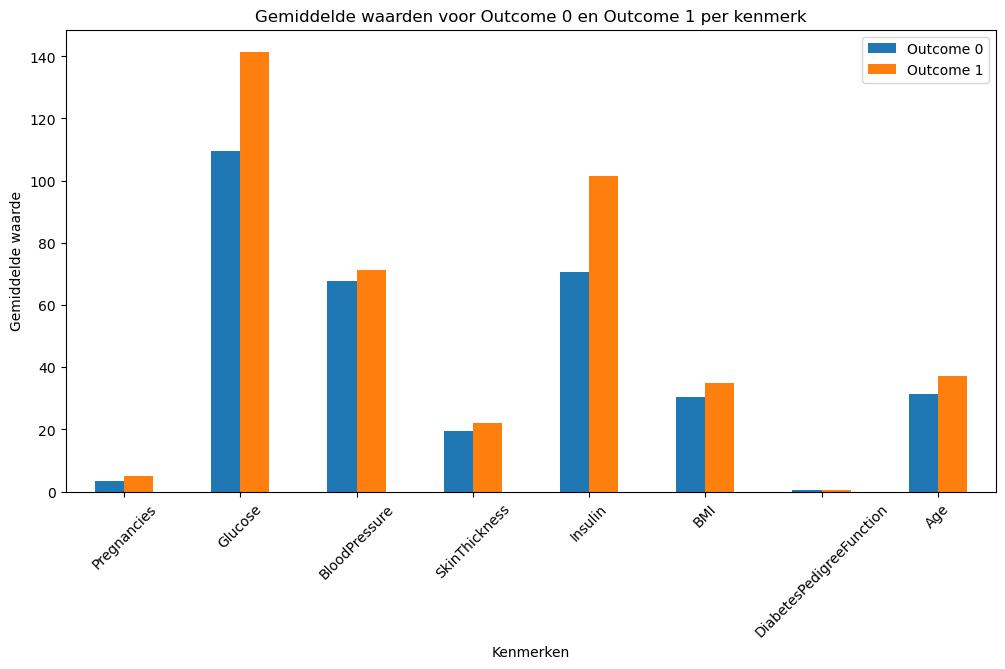

In [14]:
#Insuline hoort eigenlijk ook een invloed te hebben
#even kijken of dit gemiddeld genomen een verschil is
avg_out = train.groupby(['Outcome']).mean()
avg_out = avg_out.drop('p_id', axis=1)
avg_out = avg_out.T
outcome_labels = ['Outcome 0', 'Outcome 1']

# Plot de barplots voor elke waarde (kolom)
avg_out.plot(kind='bar', figsize=(12, 6))
plt.xticks(rotation=45)  # Rotatie van x-as labels voor leesbaarheid
plt.xlabel('Kenmerken')
plt.ylabel('Gemiddelde waarde')
plt.title('Gemiddelde waarden voor Outcome 0 en Outcome 1 per kenmerk')
plt.legend(outcome_labels)
plt.show()

##### Zoals we al eerder hebben laten zien in de EDA kun je zien dat bij hoge waardes van bijvoorbeeld glucose de Outcome vaker 1 is (Dus diabetes). Hieruit kunnen we ook nog opmerken dat dit ook sterk geld voor Insulin

######  We hebben gekozen voor een andere manier om om te gaan met onze Nul/NaN-waardes dan waarmee we gewend zijn voor deze methode moeten we alleen wel NaN waardes hebben, Hierbij veranderen we om te beginnen alleen de 0 metingen van de kolommen waarbij wij denken dat interessant is voor het model. Later kunnen we nog kijken om waarden van bloodpressure die laag zijn of absurd hoge glucose hierbij mee te nemen

In [15]:
#Hierbij hebben we missende waardes nodig dus de belangrijke "0" waardes gaan we vervangen met 0
cols = ['Glucose', 'Insulin', 'SkinThickness', 'BloodPressure', 'BMI']

for col in cols:
    train[col] = train[col].replace(0, np.nan)


In [16]:
#Check: of de nan waardes er zijn
train.isna().sum()

p_id                          0
Pregnancies                   0
Glucose                       4
BloodPressure                31
SkinThickness               184
Insulin                     300
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [25]:
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

errors = []
n_neighbors_options = range(1, 21)  # bijvoorbeeld: van 1 tot 20 buren

X_train, X_test = train_test_split(train, test_size=0.2, random_state=42)

for n_neighbors in n_neighbors_options:
    imputer = KNNImputer(n_neighbors=n_neighbors)
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)
    
    # Rijen verwijderen die NaN-waarden bevatten in het oorspronkelijke X_test
    X_test_filtered = X_test.dropna()
    X_test_imputed_filtered = pd.DataFrame(X_test_imputed, index=X_test.index).loc[X_test_filtered.index]
    
    # Bereken de MSE voor de gefilterde datasets
    mse = mean_squared_error(X_test_imputed_filtered, X_test_filtered)
    errors.append(mse)

best_n_neighbors = n_neighbors_options[errors.index(min(errors))]
print(f"beste aantal neighbors: {best_n_neighbors}")


beste aantal neighbors: 1


##### 1. Voorbereiden van de Data
We splitsen de volledige dataset in twee delen: een trainingsset en een testset. De trainingsset helpt ons bij het "leren" van de imputatie, terwijl de testset wordt gebruikt om de kwaliteit van de imputatie te evalueren.

##### 2. Iteratie over Buren
Om de beste waarde voor het aantal buren in KNN te vinden, proberen we verschillende waarden uit. Voor elk aantal buren wordt de KNN-imputatie afzonderlijk uitgevoerd.

##### 3. Imputatie
Tijdens elke iteratie (voor elk aantal buren) voeren we de imputatie uit. Dit betekent dat we de KNN-methode gebruiken om de ontbrekende waarden in de trainingsset te schatten.

##### 4. Validatie en Foutmeting
Na de imputatie evalueren we de kwaliteit ervan door de imputatieresultaten op de testset te vergelijken met de werkelijke waarden. We gebruiken de gemiddelde kwadratische fout (Mean Squared Error, MSE) om dit verschil te kwantificeren.Hierbij moesten we wel de NaN-waardes verbergen sinds het geen error kan berekenen als 1 of beide waardes waarmee je vergelijkt missen


##### 5. Kies Optimaal Aantal Buren
Na het evalueren van de imputatie voor alle mogelijke waarden van het aantal buren, kiezen we de waarde die de laagste MSE oplevert. Deze waarde wordt beschouwd als het optimale aantal buren voor de KNN-imputatie voor onze dataset.






In [26]:
from sklearn.preprocessing import StandardScaler

# Hier normalizeren we de data, dit kan voor meer nauwkeurige data zorgen bij KNN
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(train), columns=train.columns)

# Voer vervolgens KNN-imputatie uit
imputer = KNNImputer(n_neighbors=1)
df_imputed_scaled = pd.DataFrame(imputer.fit_transform(df_scaled), columns=train.columns)

# Zet de geïmputeerde, geschaalde gegevens terug naar de oorspronkelijke schaal
imputed_train = pd.DataFrame(scaler.inverse_transform(df_imputed_scaled), columns=train.columns)

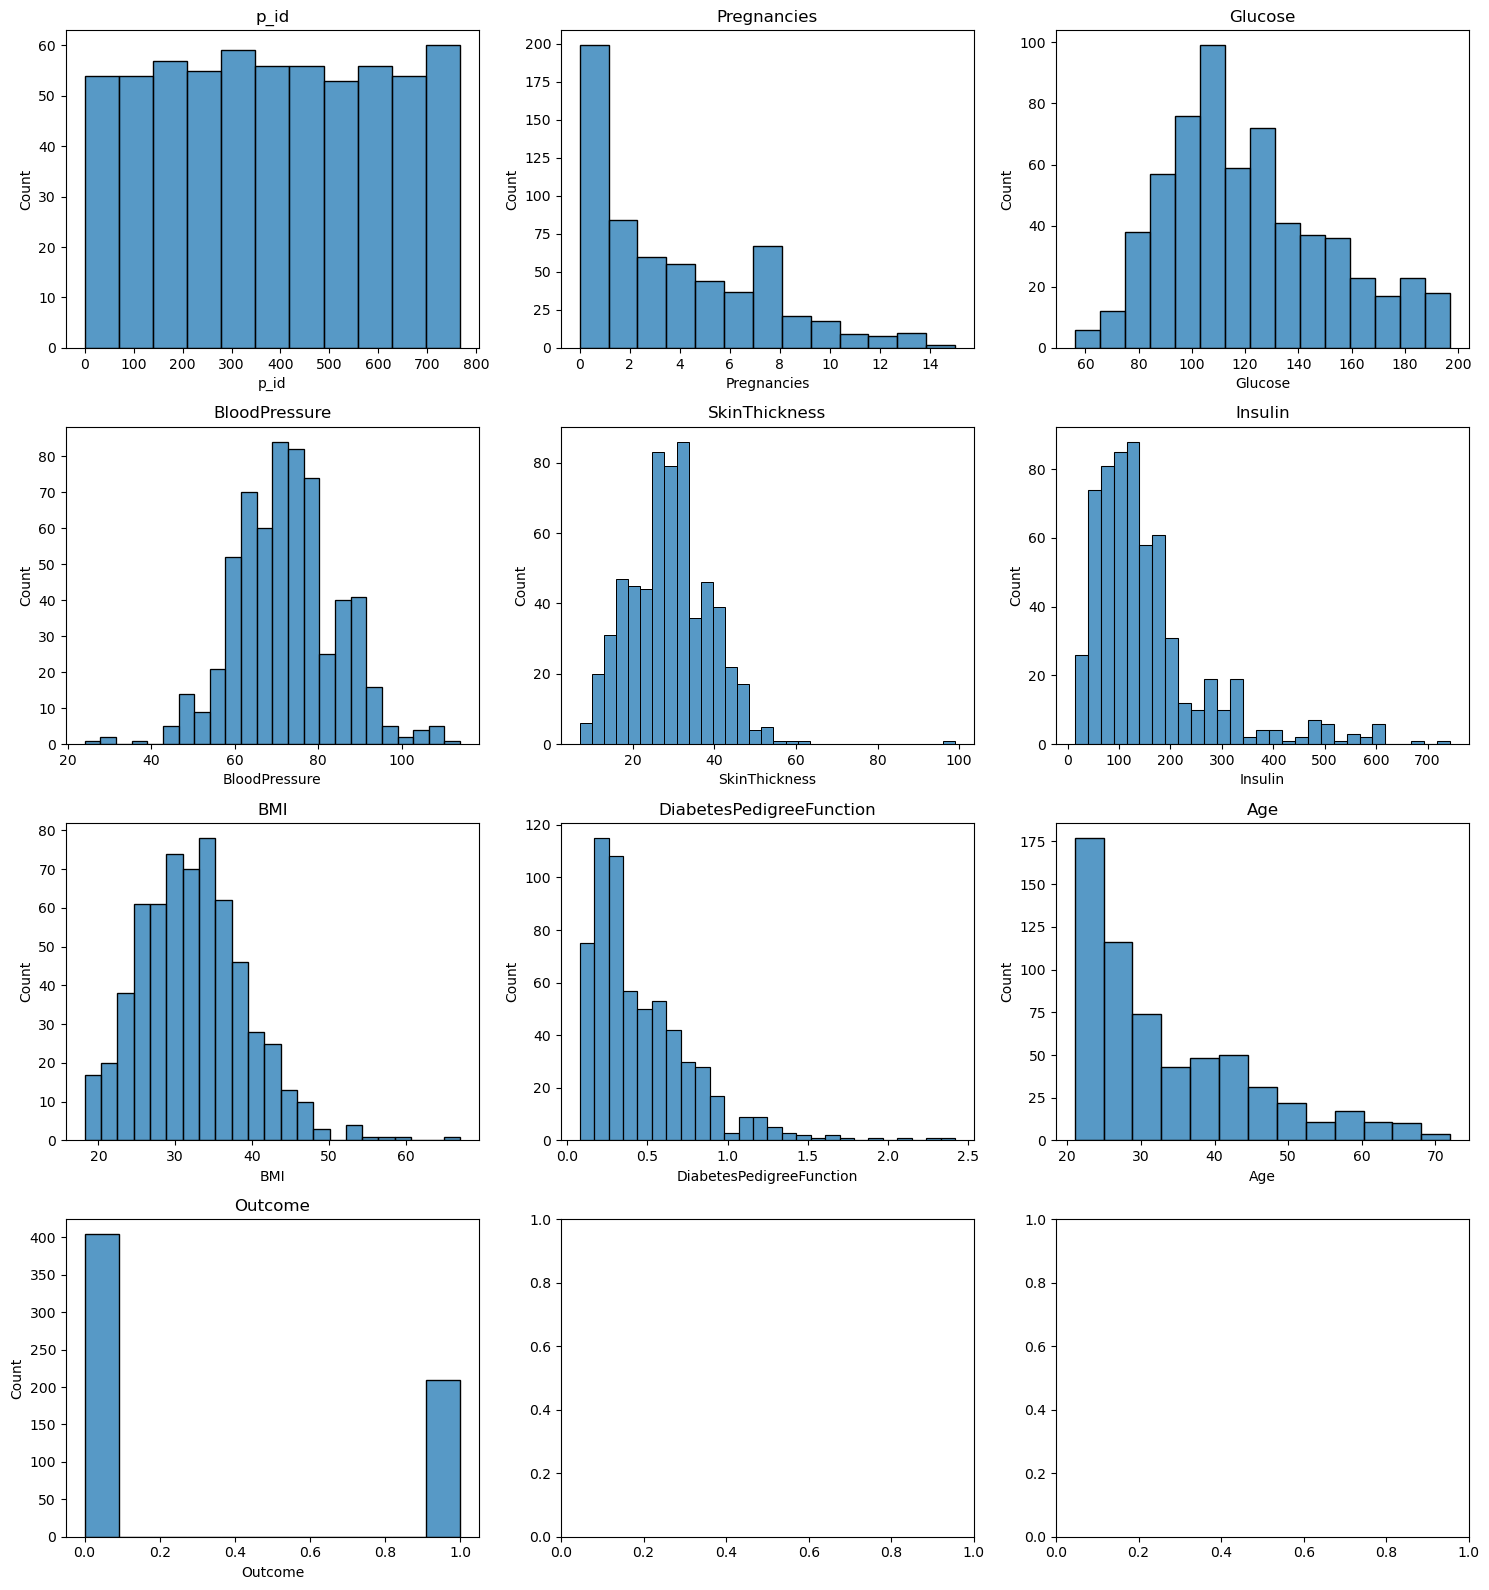

In [27]:
fig, axes = plt.subplots(len(imputed_train.columns) // 3 + (len(imputed_train.columns) % 3 > 0), 3, figsize=(15, 5 * len(imputed_train.columns) // 3))

for idx, col in enumerate(imputed_train.columns):
    sns.histplot(imputed_train[col], ax=axes.ravel()[idx])
    axes.ravel()[idx].set_title(col)

plt.tight_layout()
plt.show()

In [29]:
imputed_train.isna().sum()

p_id                        0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Hier kunnen we zien dat de waardes die eerst een 0 meting hadden nu goed zijn verdeeld, Nu is het alleen nog de vraag wat we willen doen met de verre uitschieters voornamelijk Bij insuline en Skinthickness. Sinds het zo aanzienlijk weinig onlogische uitschieters zijn denk ik niet dat het veranderen van de meetingen veel gaat doen voor het model 

Maar we kunnen altijd kijken of de modellen beter preseteren als we de rijen van insuline > 600 en skintickness 100 eruit halen

##### Beschrijf wat wordt bedoeld met het standaardiseren van de data. Geef aan in welke gevallen dit gewenst is. Beargumenteer of het waarde toevoegt voor deze dataset en voer eventueel standaardisatie uit. 

Standaardiseren van data verwijst naar het proces waarbij de waarden van verschillende variabelen of kenmerken in een dataset worden omgezet zodat ze een vergelijkbare schaal hebben. Dit wordt meestal gedaan door de gegevens te transformeren zodat ze een gemiddelde van nul hebben en een standaarddeviatie (variantie) van één. In essentie wordt elke waarde in de dataset gecentreerd rond het gemiddelde en schalen we de waarden zodat ze een vergelijkbare spreiding hebben. 

Op basis van de weergegeven statistieken lijken de numerieke variabelen in deze dataset redelijk vergelijkbare schalen en orde van grootte te hebben. Het gemiddelde en de standaarddeviatie variëren niet sterk tussen de variabelen.

In dit specifieke geval lijkt standaardisatie mogelijk niet strikt noodzakelijk, vooral als je van plan bent algoritmen te gebruiken die niet bijzonder gevoelig zijn voor de schaal van de variabelen, zoals beslissingsbomen of random forests. Echter, als je van plan bent om algoritmen te gebruiken die afhankelijk zijn van de afstand tussen datapunten, zoals K-Nearest Neighbors (KNN) of Support Vector Machines (SVM), kan het nog steeds gunstig zijn om te standaardiseren om ervoor te zorgen dat alle variabelen op een vergelijkbare schaal liggen.

<b>Bevindingen EDA</b>

Een belangrijke bevinding van ons EDA is dat Glucose een positieve correlatie heeft met de outcome. 
Ook is gemiddeld genomen de mensen zonder suikerziekte een lagere insuline gehalte hebben als mensen met een hoger gehalte.

<h4 style="color:#7CAFC4">Opdracht 2: Evaluatie </h2>

<b>Deze opdracht heeft betrekking op een bepaalde vorm van machine learning. Welke vorm is dit? Licht het antwoord toe.</b>

Voor het voorspellen van suikerziekte(diabetes) gebruiken we feature kolommen om de "Outcome" kolom te voorspellen. De kolom Outcome heeft 2 mogelijke values 0 voor geen suikerziekte en 1 voor wel suikerziekte. Hierbij hebben we dus te maken met een classificatie probleem

<b>Geef aan met welke “metrics”, voor deze vorm van machine learning, bepaalt kan worden hoe goed een model presteert. Toon de uitkomsten op deze metrics aan de hand van een zelf te kiezen machine learning algoritme. <b/>

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Split de data in X en y Train en Test data
X = imputed_train.drop('Outcome', axis=1)
y = imputed_train['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regressie model maken en fitten
model = LogisticRegression(max_iter =  1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Accuracy score berekenen
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy * 100:.2f}%")

Precision = precision_score(y_test, y_pred)
print(f"Precision Score: {Precision * 100:.2f}%")

recall = recall_score(y_test, y_pred)
print(f"Recall Score: {recall * 100:.2f}%")

f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1 * 100:.2f}%")

Accuracy Score: 79.46%
Precision Score: 77.19%
Recall Score: 63.77%
F1-score: 69.84%


1. Nauwkeurigheid (Accuracy): Geeft het percentage van de correct voorspelde observaties aan ten opzichte van het totaal aantal observaties.

2. Precision (Precisie): Van alle positieve voorspellingen, hoeveel waren er daadwerkelijk positief.

3. Recall(Gevoeligheid): Van alle werkelijke positieve gevallen, hoeveel hebben we correct voorspeld.

4. F1-score: De harmonische gemiddelde van Precision en Recall en biedt een evenwicht tussen de twee.

Om dit te weergeven in Jupyter notebook hebben we gekozen voor Logistic Regression

<b>Leg uit hoe iedere metric wordt berekend. Gebruik hierbij een confusion matrix.</b>

<b>Kies een metric die in jullie ogen het meest relevant is en beargumenteer je keuze.</b>

Accuracy Score: 79.46%
Precision Score: 77.19%
Recall Score: 63.77%
F1-score: 69.84%


array([[103,  13],
       [ 25,  44]], dtype=int64)

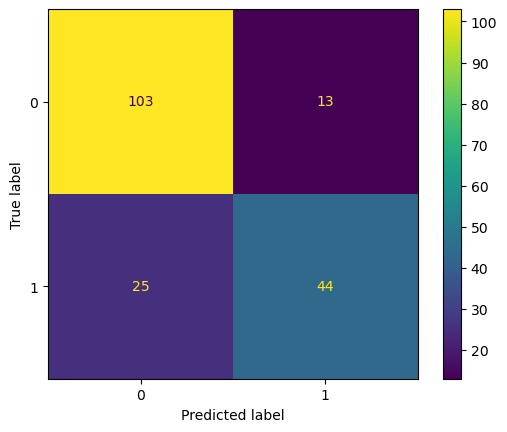

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
accuracy = (TN + TP) / (TN + FP + TP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2* precision * recall / (precision + recall)
print(f"Accuracy Score: {accuracy * 100:.2f}%")
print(f"Precision Score: {Precision * 100:.2f}%")
print(f"Recall Score: {recall * 100:.2f}%")
print(f"F1-score: {f1 * 100:.2f}%")

disp = ConfusionMatrixDisplay(cm)
disp.plot()
display(cm)


Hierbij denken wij dat accuracy de belangrijkste metric is om naar te kijken sinds wij het meest benieuwd zijn naar de verhouding van correct voorspelde observaties tot het totaal aantal observaties.

EXTRA: We missen nog een kleine extra uitleg over hoe de "Metrics" worden berekend aan de hand van de confusion matrics(CM). en misschien de tekst nog wat netter of uitgebreider uitleggen